In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx


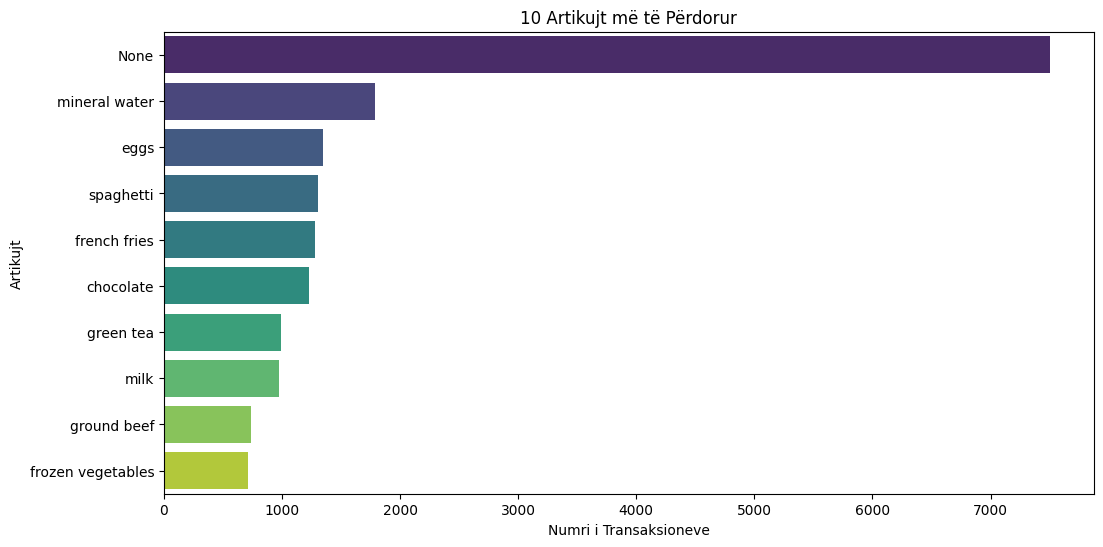

In [8]:

# Ngarko të dhënat
store_data = pd.read_csv("Downloads/store_data.csv", header=None)

# Mbush vlerat NaN me 'None'
store_data.fillna('None', inplace=True)

# Konverto në listë listash
transactions = store_data.values.tolist()

# Kodimi i transaksioneve
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Hapi 1: Vizualizimi i 10 artikujve më të përdorur
item_counts = df.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, hue=item_counts.index, dodge=False, palette="viridis", legend=False)
plt.title('10 Artikujt më të Përdorur')
plt.xlabel('Numri i Transaksioneve')
plt.ylabel('Artikujt')
plt.show()

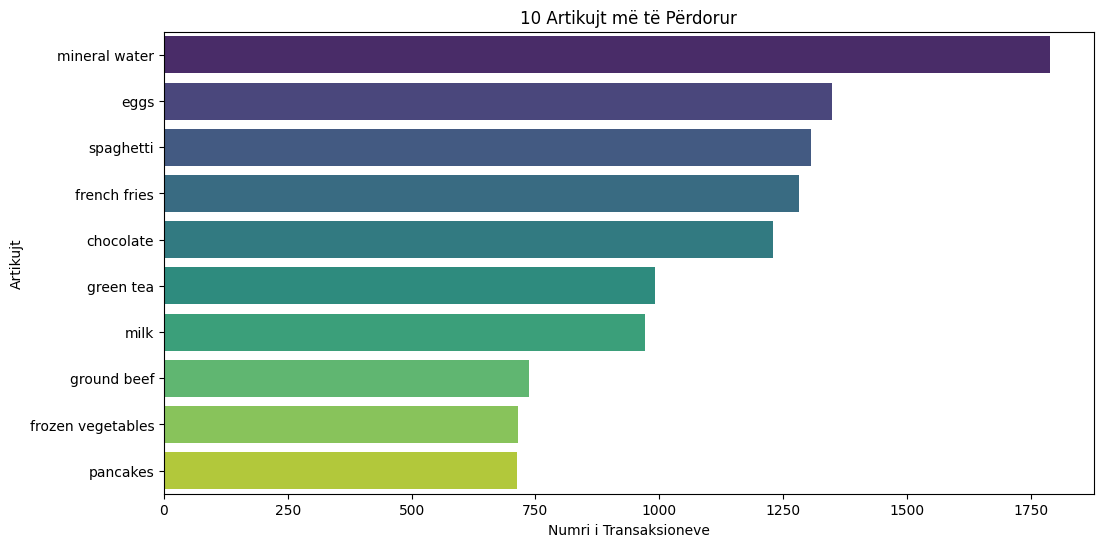

Rreshtat e parë të DataFrame:
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs              None          None   
2        chutney       None        None              None          None   
3         turkey    avocado        None              None          None   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1              None  None            None          None          None   
2              None  None            None          None          None   
3              None  None            None          None          None   
4              None  None            None          None          None   

               10         11     12     13             14      15  \
0  low fat 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Ngarko të dhënat
store_data = pd.read_csv("Downloads/store_data.csv", header=None)

# Mbush vlerat NaN me 'None'
store_data.fillna('None', inplace=True)

# Konverto në listë listash
transactions = store_data.values.tolist()

# Kodimi i transaksioneve
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Përjashto kolonën 'None' nga DataFrame
if 'None' in df.columns:
    df = df.drop(columns=['None'])

# Hapi 1: Vizualizimi i 10 artikujve më të përdorur
item_counts = df.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, hue=item_counts.index, dodge=False, palette="viridis", legend=False)
plt.title('10 Artikujt më të Përdorur')
plt.xlabel('Numri i Transaksioneve')
plt.ylabel('Artikujt')
plt.show() 


print("Rreshtat e parë të DataFrame:")
print(store_data.head())

In [16]:
frequent_itemsets_support = apriori(df, min_support=0.01, use_colnames=True)
rules_support = association_rules(frequent_itemsets_support, metric="support", min_threshold=0.01)
print("Rregullat e Asociimit duke përdorur Support:")
print(rules_support)

Rregullat e Asociimit duke përdorur Support:
                    antecedents                 consequents  \
0                     (avocado)             (mineral water)   
1               (mineral water)                   (avocado)   
2                     (burgers)                      (cake)   
3                        (cake)                   (burgers)   
4                   (chocolate)                   (burgers)   
..                          ...                         ...   
427   (pancakes, mineral water)                 (spaghetti)   
428  (spaghetti, mineral water)                  (pancakes)   
429                  (pancakes)  (spaghetti, mineral water)   
430                 (spaghetti)   (pancakes, mineral water)   
431             (mineral water)       (pancakes, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.033329            0.238368  0.011598    0.348000  1.459926   
1              0.238368            0.033

In [17]:
# Apriori për Confidence
frequent_itemsets_confidence = apriori(df, min_support=0.01, use_colnames=True)
rules_confidence = association_rules(frequent_itemsets_confidence, metric="confidence", min_threshold=0.5)
print("Rregullat e Asociimit duke përdorur Confidence:")
print(rules_confidence)

Rregullat e Asociimit duke përdorur Confidence:
           antecedents      consequents  antecedent support  \
0  (eggs, ground beef)  (mineral water)            0.019997   
1  (ground beef, milk)  (mineral water)            0.021997   

   consequent support   support  confidence      lift  representativity  \
0            0.238368  0.010132    0.506667  2.125563               1.0   
1            0.238368  0.011065    0.503030  2.110308               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.005365    1.543848       0.540342  0.040816   0.352268    0.274586  
1  0.005822    1.532552       0.537969  0.044385   0.347493    0.274725  


In [18]:
frequent_itemsets_lift = apriori(df, min_support=0.01, use_colnames=True)
rules_lift = association_rules(frequent_itemsets_lift, metric="lift", min_threshold=1)
print("Rregullat e Asociimit duke përdorur Lift:")
print(rules_lift)

Rregullat e Asociimit duke përdorur Lift:
                    antecedents                 consequents  \
0                     (avocado)             (mineral water)   
1               (mineral water)                   (avocado)   
2                     (burgers)                      (cake)   
3                        (cake)                   (burgers)   
4                   (chocolate)                   (burgers)   
..                          ...                         ...   
401   (pancakes, mineral water)                 (spaghetti)   
402  (spaghetti, mineral water)                  (pancakes)   
403                  (pancakes)  (spaghetti, mineral water)   
404                 (spaghetti)   (pancakes, mineral water)   
405             (mineral water)       (pancakes, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.033329            0.238368  0.011598    0.348000  1.459926   
1              0.238368            0.033329

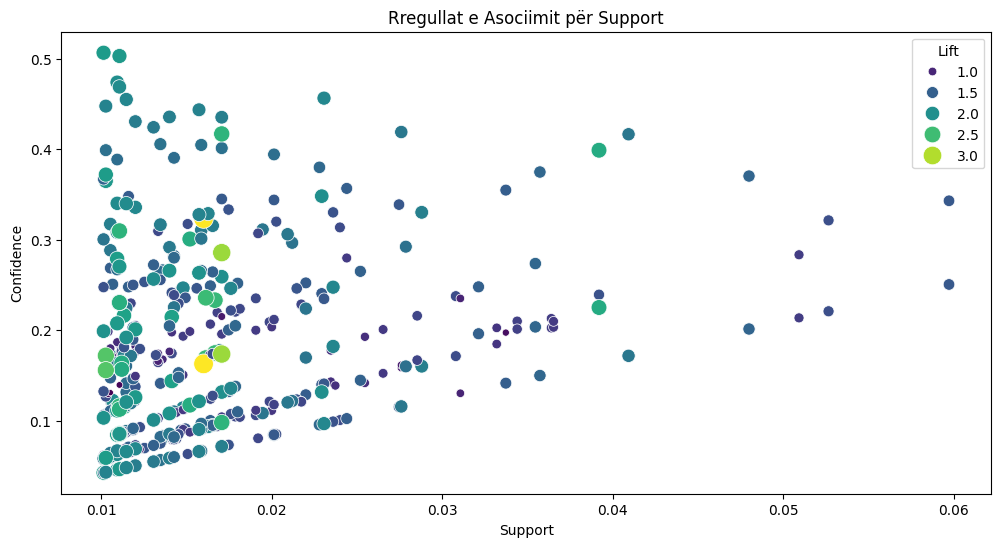

In [19]:
# Vizualizimi i rregullave të asociimit për Support
plt.figure(figsize=(12, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules_support, palette='viridis', sizes=(20, 200))
plt.title('Rregullat e Asociimit për Support')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()

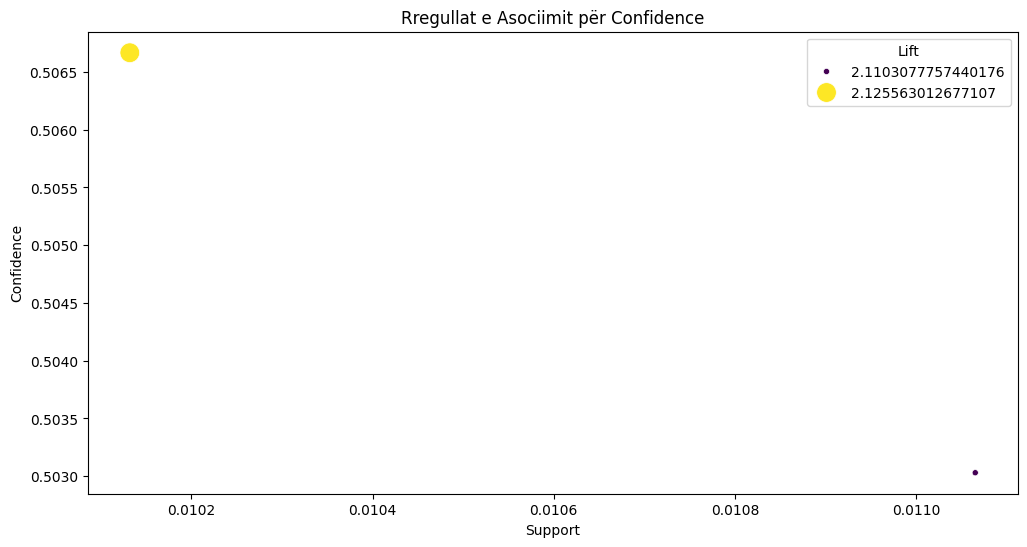

In [20]:
# Vizualizimi i rregullave të asociimit për Confidence
plt.figure(figsize=(12, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules_confidence, palette='viridis', sizes=(20, 200))
plt.title('Rregullat e Asociimit për Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()

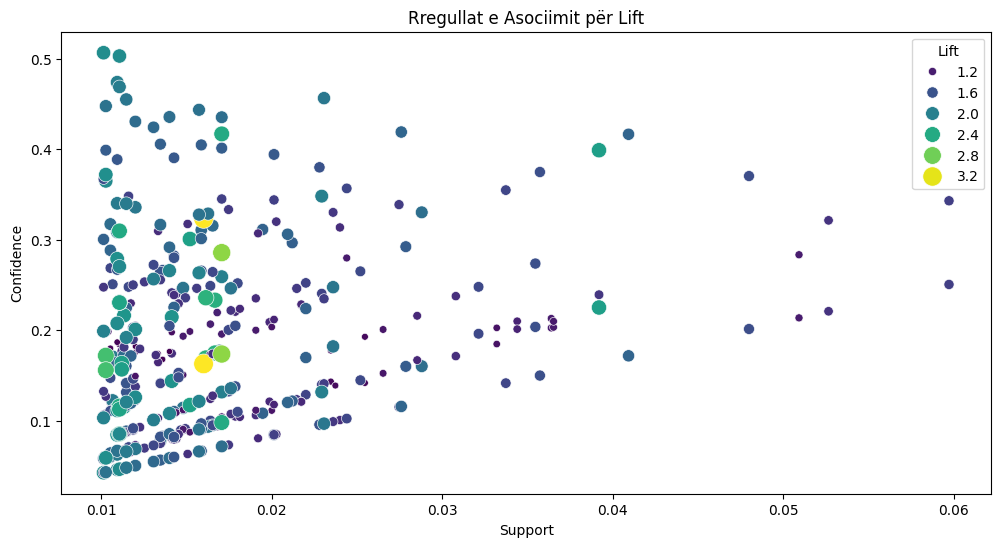

In [21]:
# Vizualizimi i rregullave të asociimit për Lift
plt.figure(figsize=(12, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules_lift, palette='viridis', sizes=(20, 200))
plt.title('Rregullat e Asociimit për Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()
